In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("February 19.csv", index_col="Unnamed: 0")

In [3]:
df = df.drop("Bank Name", axis = 1)

df.head()

,ATMs Onsite,ATMs Offsite,POS Online,Credits cards outstanding at the end of the month,CC No. of transactions ATM,CC No. of transactions POS,CC Amount of transactions ATM,CC Amount of transactions POS,Debits cards outstanding at the end of the month,DC No. of transactions ATM,DC No. of transactions POS,DC Amount of transactions ATM,DC Amount of transactions POS
0,631,200,3176,0,0,0,0,0,6049046,8736133,2893368,20881,2870
1,3025,773,15895,297282,14808,523048,74,1288,28048189,9846798,5858733,32749,7162
2,6430,3247,51960,216885,8515,526791,32,1156,59918420,19719888,10904078,84197,12860
3,2596,3558,64884,184049,22048,287734,122,716,59139931,34343155,8217880,63170,8315
4,1314,556,3105,0,0,0,0,0,5085031,6772706,3983391,24071,2867


In [4]:
scaler = StandardScaler()

scaler.fit(df)

df_scaled = scaler.transform(df)

/home/ankita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ankita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [5]:
number_of_clusters = range(3, 12)
inertia = []

for i in number_of_clusters:
    
    model = KMeans(n_clusters=i)

    model.fit(df_scaled)
    
    inertia.append(model.inertia_)

In [6]:
inertia

[154.44316731761538,
 94.97671638693015,
 70.97116870828302,
 48.48587125158851,
 32.084544738369246,
 24.952123037084256,
 20.70550671383149,
 16.178893318692353,
 13.43656825066235]

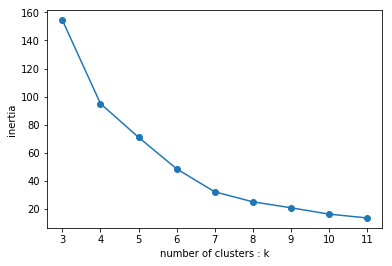

In [7]:
plt.plot(number_of_clusters, inertia, marker='o')
plt.xlabel("number of clusters : k")
plt.ylabel("inertia")
plt.show()

In [8]:
model = KMeans(n_clusters = 7)

model.fit(df_scaled)

labels = model.predict(df_scaled)

print(labels)

[0 6 6 6 0 6 0 0 0 0 0 0 0 6 0 0 6 0 0 0 1 2 0 0 0 0 0 0 3 2 0 5 0 0 0 5 4
 0 0 0 0 5 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


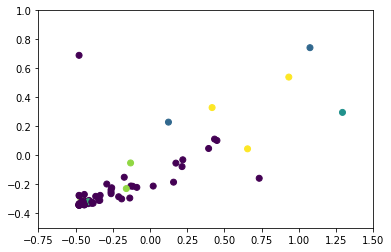

In [9]:
x = df_scaled[:, 0]
y = df_scaled[:, 8]

plt.scatter(x, y, c=labels)
plt.xlim(-0.75, 1.5)
plt.ylim(-0.5, 1)
plt.show()

In [10]:
model = TSNE(learning_rate=100)

df_transformed = model.fit_transform(df_scaled)

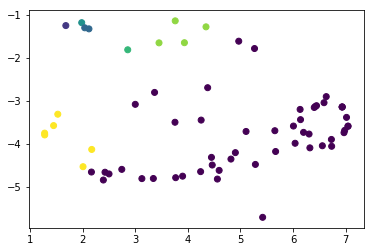

In [11]:
x = df_transformed[:, 0]
y = df_transformed[:, 1]

plt.scatter(x, y, c=labels)
plt.show()